In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


## Reading Dataset

In [73]:
import pandas as pd
df = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [74]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Importing useful Libraries

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

## Data Visualization

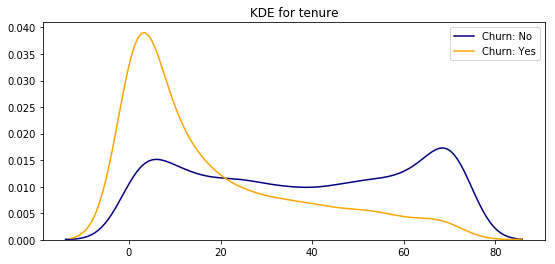

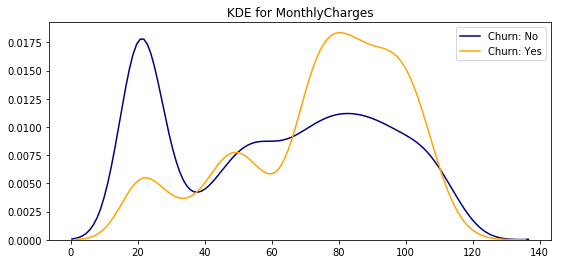

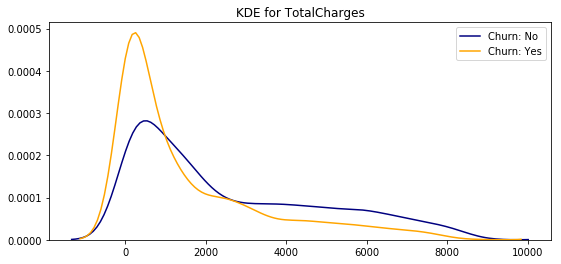

In [77]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

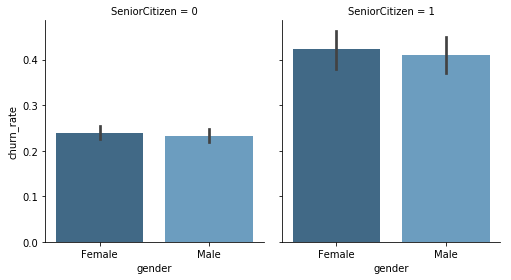

In [78]:
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])

In [79]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()

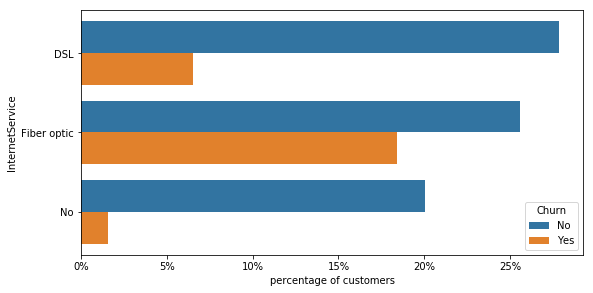

In [80]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

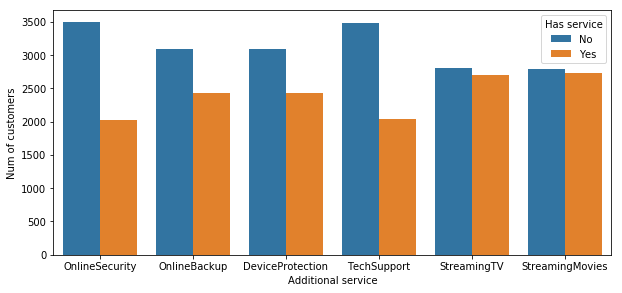

In [81]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

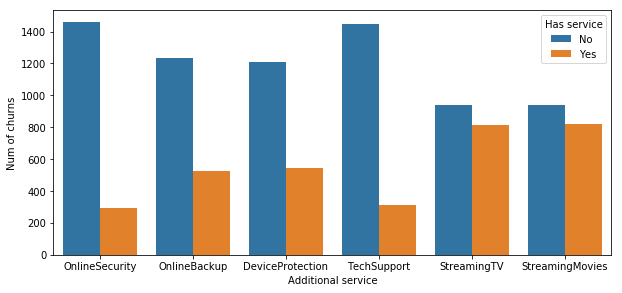

In [82]:
plt.figure(figsize=(10, 4.5))
df1 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

In [83]:
df_d=df.iloc[:,1:]

In [84]:
# transfrom yes,no to 1,0
df_d['Churn'].replace(to_replace='Yes',value=1,inplace=True) 
df_d['Churn'].replace(to_replace='No',value=0,inplace=True)

In [85]:
#get_dummy 
df_dum= pd.get_dummies(df_d)
df_dum.columns.values

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'churn_rate', 'gender_Female', 'gender_Male',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One

In [86]:
# choose variables 
x=df_dum.drop(columns=['Churn']) 
y=df_dum['Churn'] 
#normalization 
from sklearn.preprocessing import MinMaxScaler 
features=x.columns.values 
scaler=MinMaxScaler(feature_range=(0,1)) 
scaler.fit(x) 
x=pd.DataFrame(scaler.transform(x)) 
x.columns=features

In [87]:
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,churn_rate,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.003437,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.217564,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.012453,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.211951,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.017462,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Splitting Dataset into train and test split

In [88]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=90)

## RandomForest Classification Model

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
model_r=RandomForestClassifier(random_state=50) 
model_r.fit(x_train,y_train) 
rf_pred=model_r.predict(x_test)
print('output rows number',len(rf_pred))

output rows number 2113


In [91]:
from sklearn import metrics
from sklearn.metrics import classification_report 

## Classification matrix for Random Forest

In [92]:
rf_report=classification_report(y_test, rf_pred)
print(rf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1558
           1       1.00      1.00      1.00       555

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



## ANN Classification Model

In [93]:
import keras
from keras.models import Sequential 
from keras.layers import Dense 

In [94]:
classifier = Sequential() 

In [95]:
classifier.add(Dense(23, activation= 'relu', input_dim=46)) 
classifier.add(Dense(23, activation='relu'))
classifier.add(Dense(23, activation='relu')) 
classifier.add(Dense(23, activation='relu')) 
classifier.add(Dense(1,activation='sigmoid'))

In [96]:
classifier.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy']) 
rf_pred2 = classifier.fit(x_train, y_train,
                      batch_size=30, epochs=50, validation_data=(x_test,y_test))

Train on 4930 samples, validate on 2113 samples
Epoch 1/50
4930/4930 [==============================] - 1s 130us/step - loss: 0.3955 - accuracy: 0.8132 - val_loss: 0.1230 - val_accuracy: 0.9768
Epoch 2/50
4930/4930 [==============================] - 0s 71us/step - loss: 0.0168 - accuracy: 0.9984 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/50
4930/4930 [==============================] - 0s 70us/step - loss: 6.1667e-04 - accuracy: 1.0000 - val_loss: 3.5649e-04 - val_accuracy: 1.0000
Epoch 4/50
4930/4930 [==============================] - 0s 70us/step - loss: 2.4206e-04 - accuracy: 1.0000 - val_loss: 1.7565e-04 - val_accuracy: 1.0000
Epoch 5/50
4930/4930 [==============================] - 0s 70us/step - loss: 1.2884e-04 - accuracy: 1.0000 - val_loss: 1.0443e-04 - val_accuracy: 1.0000
Epoch 6/50
4930/4930 [==============================] - 0s 68us/step - loss: 7.9482e-05 - accuracy: 1.0000 - val_loss: 6.8828e-05 - val_accuracy: 1.0000
Epoch 7/50
4930/4930 [===========================

**Accuracy of 100%**
Since the dataset is already cleaned and its size is small so the accuracy obtained from this model is 100%

## Applying K-means Clustering to make segments of potential Customers

In [97]:
customers = df[df['Churn']=='Yes']
customers = customers.drop(columns=['Churn','churn_rate'])
customers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.500000
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.050049
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.299805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.799988
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.350006
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.750000
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.250000


In [98]:
#get_dummy 
customers_dum= pd.get_dummies(customers)
customers.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'], dtype=object)

In [99]:
#normalization 
from sklearn.preprocessing import MinMaxScaler 
features=customers_dum.columns.values 
scaler=MinMaxScaler(feature_range=(0,1)) 
scaler.fit(customers_dum) 
customers_dum=pd.DataFrame(scaler.transform(customers_dum)) 
customers_dum.columns=features

In [115]:
clusters = 3
from sklearn.cluster import KMeans
kmeans = kmeans = KMeans(n_clusters=clusters)
kmeans.fit(customers_dum)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [116]:
customers['cluster'] = kmeans.labels_

In [117]:
customers_cluster = []
for i in range(clusters):
    customers_cluster.append(customers[customers['cluster']==i])

## Number of customers in Each Cluster

In [121]:
for i in range(clusters):
    print("Customers in the cluster ",i,"is ",len(customers_cluster[i]))

Customers in the cluster  0 is  793
Customers in the cluster  1 is  113
Customers in the cluster  2 is  963


## Details of Each Cluster

In [125]:
for i in range(clusters):
    print("Cluster ",i,"\n",customers_cluster[i].describe())

Cluster  0 
        SeniorCitizen      tenure  MonthlyCharges  TotalCharges  cluster
count     793.000000  793.000000      793.000000    793.000000    793.0
mean        0.303909   29.054224       93.503342   2770.784424      0.0
std         0.460234   21.395408       13.308079   2170.409424      0.0
min         0.000000    1.000000       43.750000     50.349998      0.0
25%         0.000000   10.000000       89.500000    890.599976      0.0
50%         0.000000   25.000000       95.450000   2282.550049      0.0
75%         1.000000   47.000000      101.300000   4400.750000      0.0
max         1.000000   72.000000      118.350000   8684.799805      0.0
Cluster  1 
        SeniorCitizen      tenure  MonthlyCharges  TotalCharges  cluster
count     113.000000  113.000000      113.000000    113.000000    113.0
mean        0.044248    8.238938       20.368142    173.919907      1.0
std         0.206561   13.908036        1.456851    296.409149      0.0
min         0.000000    1.000000      